# Titanic Survival Prediction

This project aims to build a machine learning model that predicts which passengers survived the Titanic disaster, using data provided by Kaggle.


## 1.Project Goals

- Accurately predict whether a passenger survived the Titanic disaster  
- Demonstrate a complete ML workflow: data cleaning, feature engineering, scaling, and modeling  
- Optimize model performance via hyperparameter tuning  
- Provide a clear, reproducible notebook documenting each step  


## 2.Dataset Description

- **Source**: Kaggle “Titanic: Machine Learning from Disaster” competition  
- **Files**:  
  - `train.csv`: 891 rows, includes both features and target (`Survived`)  
  - `test.csv`: 418 rows, includes features only (to be used for final prediction)  

- **Key Columns**:  
  - `PassengerId` – unique identifier  
  - `Pclass` – ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
  - `Name`, `Sex`, `Age` – demographic details  
  - `SibSp` – number of siblings/spouses aboard  
  - `Parch` – number of parents/children aboard  
  - `Ticket` – ticket number  
  - `Fare` – passenger fare  
  - `Cabin` – cabin number  
  - `Embarked` – port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
  - `Survived` – target variable (0 = no, 1 = yes; present only in `train.csv`)

- **Missing Data**:  
  - `Age` and `Cabin` contain missing values  
  - A small number of missing entries in `Embarked`


## 3.Environment & Library Imports

This notebook was developed and tested with Python 3.13 in a virtual environment. Key libraries include:

- **pandas**: for data loading, manipulation, and analysis  
- **NumPy**: for numerical operations and array handling  
- **scikit‑learn**: for preprocessing, model training, hyperparameter tuning, and evaluation  
  - `MinMaxScaler` for feature scaling  
  - `train_test_split` for internal validation split  
  - `LogisticRegression` (or other classifiers) for modeling  
  - `GridSearchCV` for hyperparameter optimization  
  - `accuracy_score`, `confusion_matrix` for performance metrics  
- **matplotlib** (optional): for plotting distributions, learning curves, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## 4.Data Loading & Initial Exploration

Load `train.csv` and `test.csv` into DataFrames and inspect their structure and missing values.


In [2]:
train = pd.read_csv('../data/train.csv')
test  = pd.read_csv('../data/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

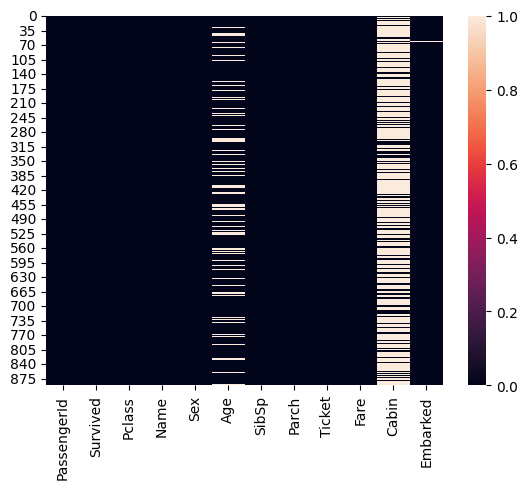

In [6]:
sns.heatmap(train.isna())

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 5. Exploratory Data Analysis (EDA)
- Check for missing values and duplicates  
- View summary statistics  
- Visualize feature distributions and relationships with quality


Text(0.5, 1.0, 'Survival rate based on Sex')

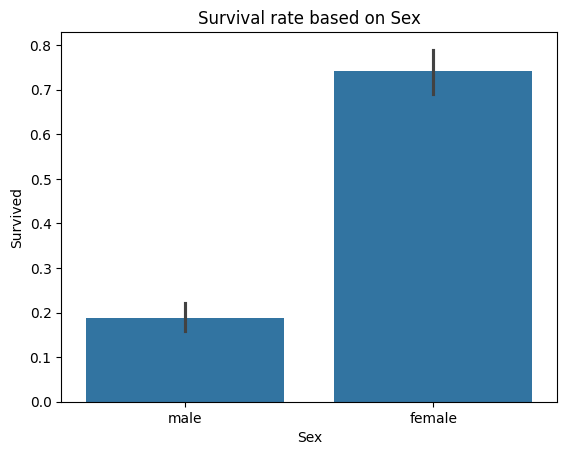

In [8]:
sns.barplot(data=train, y='Survived', x='Sex')
plt.title('Survival rate based on Sex')

Text(0.5, 1.0, 'Survival rate based on Passenger class')

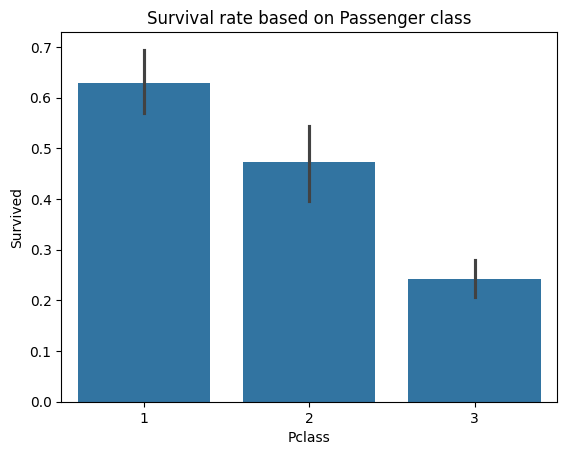

In [9]:
sns.barplot(data=train, y='Survived', x='Pclass')
plt.title('Survival rate based on Passenger class')

Text(0.5, 1.0, 'Survival rate based on Age group')

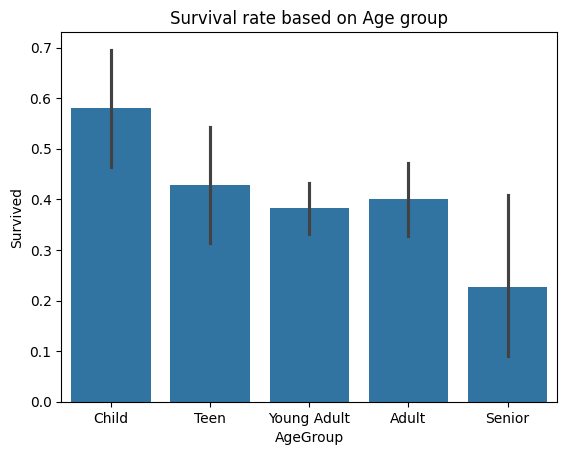

In [10]:
train['AgeGroup'] = pd.cut(train['Age'], bins=[0,12,18,35,60,80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(train, x='AgeGroup', y='Survived')
plt.title('Survival rate based on Age group')

Text(0.5, 1.0, 'Survival rate based on Siblings and Spouses')

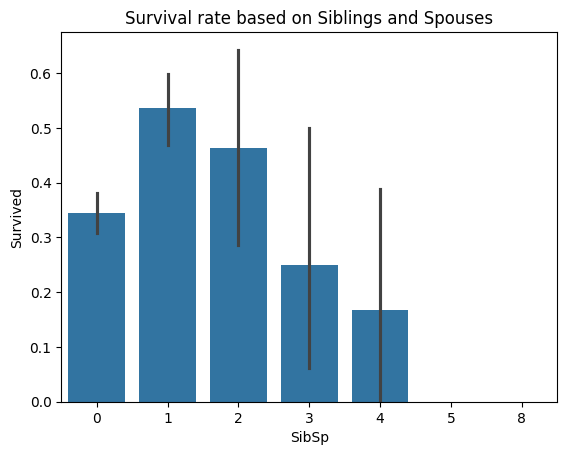

In [11]:
sns.barplot(data=train, y='Survived', x='SibSp')
plt.title('Survival rate based on Siblings and Spouses')

Text(0.5, 1.0, 'Survival rate based on Parent child relationship')

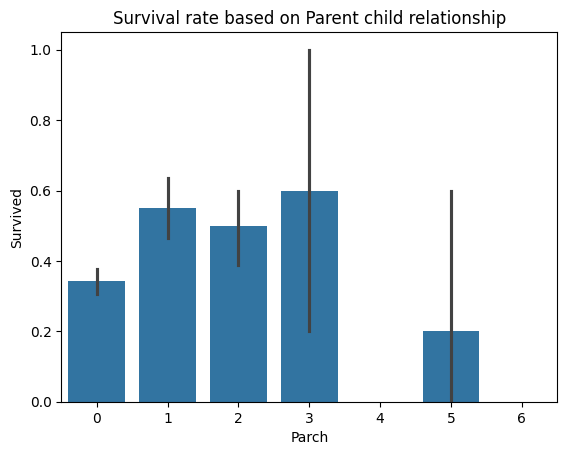

In [12]:
sns.barplot(data=train, y='Survived', x='Parch')
plt.title('Survival rate based on Parent child relationship')

In [13]:
train['Fare'].quantile([0, 0.25, 0.5, 0.75, 1.0])

0.00      0.0000
0.25      7.9104
0.50     14.4542
0.75     31.0000
1.00    512.3292
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Survival rate based on FareGroup')

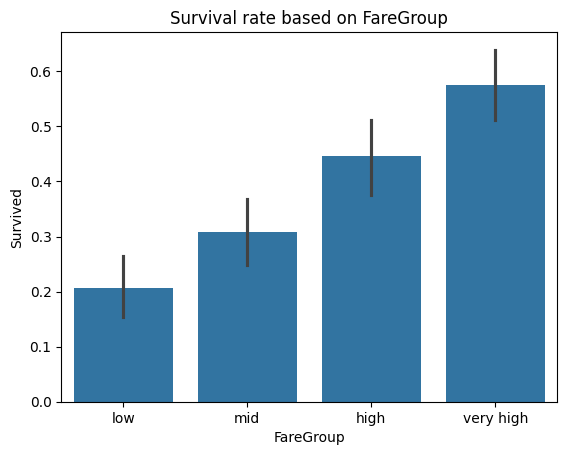

In [14]:
train['FareGroup'] = pd.cut(train['Fare'], bins=[0,7.91,14.45,31,512], labels=['low', 'mid', 'high', 'very high'])
sns.barplot(data=train, y='Survived', x='FareGroup')
plt.title('Survival rate based on FareGroup')

Text(0.5, 1.0, 'Survival rate based on Embarked location')

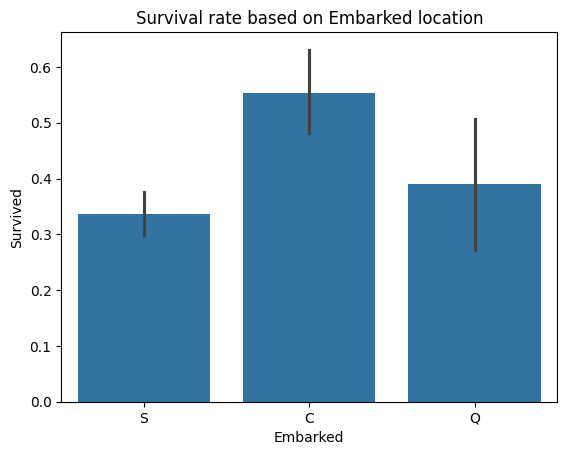

In [15]:
sns.barplot(data=train, y='Survived', x='Embarked')
plt.title('Survival rate based on Embarked location')

## 6.Data Cleaning: Dropping Duplicates & Imputing Missing Values

1. **Drop Duplicate Rows**  
   - Check for any exact duplicate records (e.g. identical PassengerId or entire row).  
   - Remove duplicates to ensure each passenger appears only once.

2. **Impute Missing `Age`**  
   - Compute the median age on the training set (less sensitive to outliers than the mean).  
   - Fill all missing `Age` values with this median so that the age distribution remains realistic.

3. **Impute Missing `Embarked`**  
   - Use `train['Embarked'].value_counts()` to find the most common embarkation port (mode).  
   - For example, if “S” (Southampton) appears most frequently, fill all missing `Embarked` entries with “S”.

4. **Handle Missing `Cabin`**  
   - Option A: Create a new binary feature `HasCabin` (1 if `Cabin` is present, 0 if missing) to capture whether cabin information exists.  
   - Option B: Drop the `Cabin` column entirely if its high missing rate outweighs its predictive value.

5. **Verify No Remaining Nulls**  
   - After imputation, confirm that there are no missing values left in the columns you intend to use for modeling.


In [16]:
train = train.drop_duplicates()
test = test.drop_duplicates()

In [17]:
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_15568\832606015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].mean(), inplace=True)
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_15568\832606015.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [18]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

C:\Users\NoteBook\AppData\Local\Temp\ipykernel_15568\2166674729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
C:\Users\NoteBook\AppData\Local\Temp\ipykernel_15568\2166674729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [20]:
train = pd.get_dummies(data=train, columns=['Sex'], dtype=int, drop_first=True)
test = pd.get_dummies(data=test, columns=['Sex'], dtype=int, drop_first=True)

In [21]:
train = pd.get_dummies(data=train, columns=['Embarked'], dtype=int, drop_first=True)
test = pd.get_dummies(data=test, columns=['Embarked'], dtype=int, drop_first=True)

In [22]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'AgeGroup', 'FareGroup'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [23]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## 7.Prepare Features & Target

Drop the target column from the training DataFrame to form the feature matrix `X`, and assign `Survived` to the target vector `y`

In [24]:
x = train.drop(['Survived'], axis=1)
y = train['Survived']

## 8.Feature Scaling

Fit a `MinMaxScaler` on the training set’s continuous features (`Age`, `SibSp`, `Parch`, `Fare`) to map them into the [0, 1] range, then apply the same scaler to the test set. This ensures all numeric inputs have comparable magnitudes while leaving dummy/categorical columns unchanged.


In [25]:
model_scores = []

scaler = MinMaxScaler()

scaling_features=['Age','SibSp','Fare','Parch']
noscaling_features=['Pclass','Sex_male','Embarked_Q','Embarked_S']

Xscaled = scaler.fit_transform(train[scaling_features])
Xscaled_df = pd.DataFrame(Xscaled, columns=scaling_features)

Xnotscaled_df = pd.DataFrame(train[noscaling_features],columns=noscaling_features)

Xtrain = pd.concat([Xscaled_df, Xnotscaled_df], axis=1)
Ytrain = train['Survived']

Xscaled_test=scaler.transform(test[scaling_features])
Xscaled_test_df=pd.DataFrame(Xscaled_test,columns=scaling_features)

Xnotscaled_test_df=pd.DataFrame(test[noscaling_features],columns=noscaling_features)

Xtest=pd.concat([Xscaled_test_df,Xnotscaled_test_df],axis=1)

x_train, x_test, y_train, y_test = train_test_split(Xtrain, Ytrain, test_size=0.3, random_state=101)

## 9.Model Implementation

From this point onward, we will implement and evaluate multiple machine learning models. For each model, we will:

- Describe the algorithm and rationale for selection  
- Perform hyperparameter tuning with cross-validation  
- Report validation performance before moving to the next model  


### Model 1: Logistic Regression

Use Logistic Regression as a baseline binary classifier. It estimates the probability of survival with a linear decision boundary and includes built‑in regularization to prevent overfitting.

- **Why**: Simple, interpretable, fast to train  
- **Hyperparameters**:  
  - `C` (inverse regularization strength): controls model complexity  
- **Validation**: 5‑fold cross‑validation via `GridSearchCV` to select the best `C` value  


In [26]:
model=LogisticRegression()
param_grid={
    'C':[1,5,10]
}
grid=GridSearchCV(model,param_grid,cv=5)
grid.fit(x_train,y_train)
print(grid.best_params_)
print("Training score:",grid.best_score_)

y_pred = grid.predict(x_test)
val_accuracy = accuracy_score(y_test, y_pred)
print("Validation accuracy for Logisitc Regression model:", val_accuracy)

model_scores.append({
    'model': 'Logistic Regression',
    'Training Accuracy ': grid.best_score_,
    'Validation Accuracy': val_accuracy
})

{'C': 10}
Training score: 0.8106580645161291
Validation accuracy for Logisitc Regression model: 0.7947761194029851


In [27]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.81      0.68      0.74       114

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268

[[136  18]
 [ 37  77]]


### Model 2: Decision Tree

A Decision Tree classifier builds a tree of decision rules by recursively splitting on feature values.

- **Why**:  
  - Captures non‑linear relationships and feature interactions  
  - Easy to visualize and interpret  
  - Handles both numeric and categorical inputs without scaling  

- **Hyperparameters**:  
  - `min_samples_split`: minimum number of samples required to split an internal node  
  - `min_samples_leaf`: minimum number of samples required to be at a leaf node (helps prevent very small, overfitting leaves)  
  - `max_depth`: maximum depth of the tree to control overfitting  
  - `criterion`: split quality measure (`"gini"` or `"entropy"`)  

- **Validation**:  
  Use `GridSearchCV` with 5‑fold CV to find the best combination of these parameters  

In [28]:
model = DecisionTreeClassifier()

param_grid = {'criterion' : ["gini", "entropy"],
             'min_samples_split' : [2, 5, 10],
             'min_samples_leaf' : [1, 2, 5, 10],
             'max_depth' : [None, 5, 10]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
print("Training score:",grid.best_score_)

y_pred = grid.predict(x_test)
val_accuracy = accuracy_score(y_test, y_pred)
print("Validation accuracy for Logisitc Regression model:", val_accuracy)

model_scores.append({
    'model': 'DecisionTree',
    'Training Accuracy ': grid.best_score_,
    'Validation Accuracy': val_accuracy
})

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 2}
Training score: 0.812258064516129
Validation accuracy for Logisitc Regression model: 0.7947761194029851


In [29]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       154
           1       0.79      0.71      0.75       114

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268

[[132  22]
 [ 33  81]]


### Model 3: Random Forest

An ensemble method that builds multiple decision trees on bootstrapped subsets of the data and averages their predictions.

- **Why**:  
  - Reduces overfitting compared to a single decision tree  
  - Captures complex feature interactions  
  - Robust to outliers and noise  

- **Hyperparameters**:  
  - `n_estimators`: number of trees in the forest  
  - `max_depth`: maximum depth of each tree

- **Validation**:  
  Use `GridSearchCV` with 5‑fold CV to tune these hyperparameters.

In [30]:
model = RandomForestClassifier()

param_grid = {'n_estimators' : [1, 5, 10, 50],
              'max_depth': [None, 5, 10]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
print("Training score:",grid.best_score_)

y_pred = grid.predict(x_test)
val_accuracy = accuracy_score(y_test, y_pred)
print("Validation accuracy for Logisitc Regression model:", val_accuracy)

model_scores.append({
    'model': 'RandomForest',
    'Training Accuracy ': grid.best_score_,
    'Validation Accuracy': val_accuracy
})

{'max_depth': 5, 'n_estimators': 50}
Training score: 0.8218967741935485
Validation accuracy for Logisitc Regression model: 0.8022388059701493


In [31]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.95      0.85       154
           1       0.90      0.61      0.72       114

    accuracy                           0.80       268
   macro avg       0.83      0.78      0.78       268
weighted avg       0.82      0.80      0.79       268

[[146   8]
 [ 45  69]]


### Model 4: K-Nearest Neighbors (KNN)

A non‑parametric, instance‑based learning algorithm that classifies a sample based on the majority vote of its k nearest neighbors in feature space.

- **Why**:  
  - Simple and intuitive  
  - Naturally captures local structure in the data  
  - No explicit training phase (lazy learner)

- **Hyperparameters**:  
  - `n_neighbors`: number of neighbors to use for voting  

- **Validation**:  
  Use `GridSearchCV` with 5‑fold CV to find the best combination of these parameters.

In [32]:
model = KNeighborsClassifier()

param_grid = {'n_neighbors' : [1, 5, 10, 25, 50]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)
print("Training score:",grid.best_score_)

y_pred = grid.predict(x_test)
val_accuracy = accuracy_score(y_test, y_pred)
print("Validation accuracy for Logisitc Regression model:", val_accuracy)

model_scores.append({
    'model': 'KNeighbors',
    'Training Accuracy ': grid.best_score_,
    'Validation Accuracy': val_accuracy
})

{'n_neighbors': 10}
Training score: 0.8154580645161291
Validation accuracy for Logisitc Regression model: 0.7835820895522388


In [33]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83       154
           1       0.89      0.56      0.69       114

    accuracy                           0.78       268
   macro avg       0.82      0.75      0.76       268
weighted avg       0.81      0.78      0.77       268

[[146   8]
 [ 50  64]]


## Model Comparison

After training and evaluating all models using cross-validation, we compare their performance based on training and validation accuracy.

The table below summarizes the results:

| Model               | Training Accuracy | Validation Accuracy |
|--------------------|-------------------|---------------------|
| Random Forest       | 0.8219            | 0.8022              |
| Logistic Regression | 0.8107            | 0.7948              |
| Decision Tree       | 0.8123            | 0.7948              |
| K-Nearest Neighbors | 0.8155            | 0.7836              |

- **Random Forest** achieved the highest validation accuracy (≈80.2%) and shows a good balance between bias and variance.  
- **Logistic Regression** and **Decision Tree** performed similarly and only slightly below Random Forest.  
- **KNN** had the lowest validation accuracy, likely due to its sensitivity to feature scaling and local noise.

> ✅ Based on these results, **Random Forest** can be selected as the final model for prediction on the test set.


In [34]:
result=pd.DataFrame(model_scores)
result.sort_values(by='Validation Accuracy', ascending=False, inplace=True)
(result)

,model,Training Accuracy,Validation Accuracy
2,RandomForest,0.821897,0.802239
0,Logistic Regression,0.810658,0.794776
1,DecisionTree,0.812258,0.794776
3,KNeighbors,0.815458,0.783582
